# CarDekho - Car Price Prediction Project

__Importing Required Libraries__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

## Step-1: Data Understanding and routine check

In [2]:
cardata = pd.read_excel('Cardekho dataset.xlsx')
cardata.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [3]:
cardata.shape

(8128, 12)

In [4]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


Our Target variable here is selling_price

## Step-2: Data Cleaning & EDA

__Checking Missing Values__

In [5]:
(cardata.isnull().sum()/len(cardata))*100

name                  0.000000
year                  0.000000
selling_price         0.000000
km_driven             0.000000
fuel                  0.000000
seller_type           0.000000
transmission          0.000000
owner                 0.000000
mileage(km/ltr/kg)    2.718996
engine                2.718996
max_power             2.645177
seats                 2.718996
dtype: float64

Looks like there are few missing values in Mileage, engine, max_power, seats columns

In [6]:
cardata['max_power'] = cardata['max_power'].replace({" ": np.NaN})

Dropping Missing values

In [7]:
cardata.dropna(inplace=True)

In [8]:
(cardata.isnull().sum()/len(cardata))*100

name                  0.0
year                  0.0
selling_price         0.0
km_driven             0.0
fuel                  0.0
seller_type           0.0
transmission          0.0
owner                 0.0
mileage(km/ltr/kg)    0.0
engine                0.0
max_power             0.0
seats                 0.0
dtype: float64

In [9]:
cardata.shape

(7906, 12)

In [10]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                7906 non-null   object 
 1   year                7906 non-null   int64  
 2   selling_price       7906 non-null   int64  
 3   km_driven           7906 non-null   int64  
 4   fuel                7906 non-null   object 
 5   seller_type         7906 non-null   object 
 6   transmission        7906 non-null   object 
 7   owner               7906 non-null   object 
 8   mileage(km/ltr/kg)  7906 non-null   float64
 9   engine              7906 non-null   float64
 10  max_power           7906 non-null   float64
 11  seats               7906 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 803.0+ KB


In [11]:
cardata.drop(columns=['name'], inplace=True)

In [12]:
cardata['year'] = cardata['year'].astype('object')

In [13]:
cardata.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


__Dividing columns into numeric and categorical list for further analysis__

In [14]:
cat_cols = ['year','fuel','seller_type','transmission','owner']
num_cols = ['selling_price','km_driven','mileage(km/ltr/kg)','engine','max_power','seats']

#### Inspecting Target variable

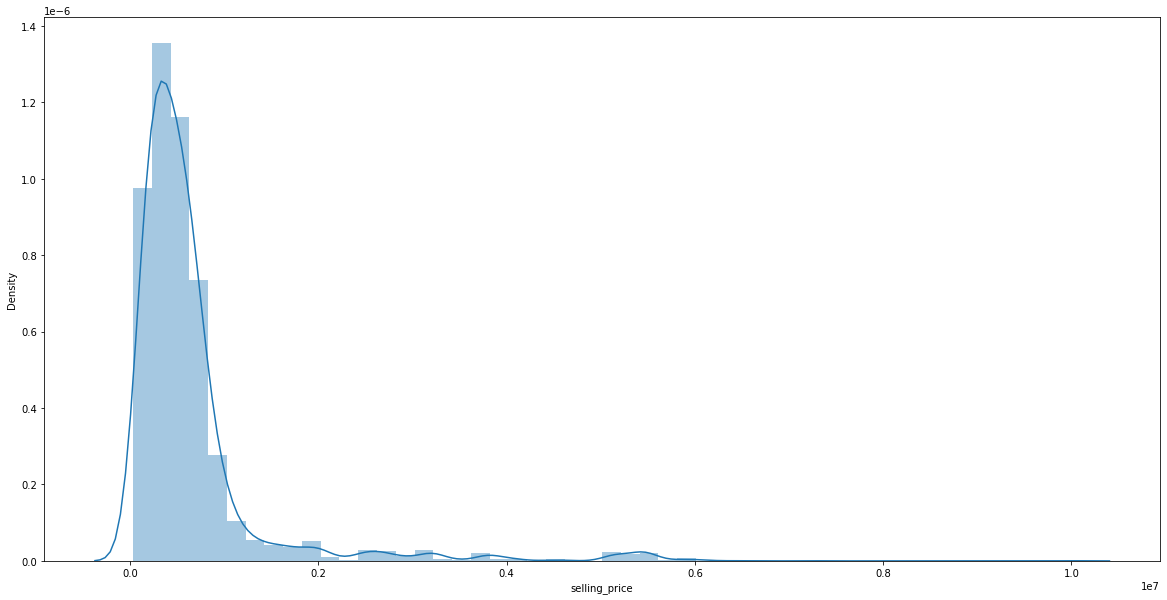

In [15]:
plt.figure(figsize = [20,10])

sns.distplot(cardata['selling_price'])
plt.show()

### Analysis of Categorical Variables

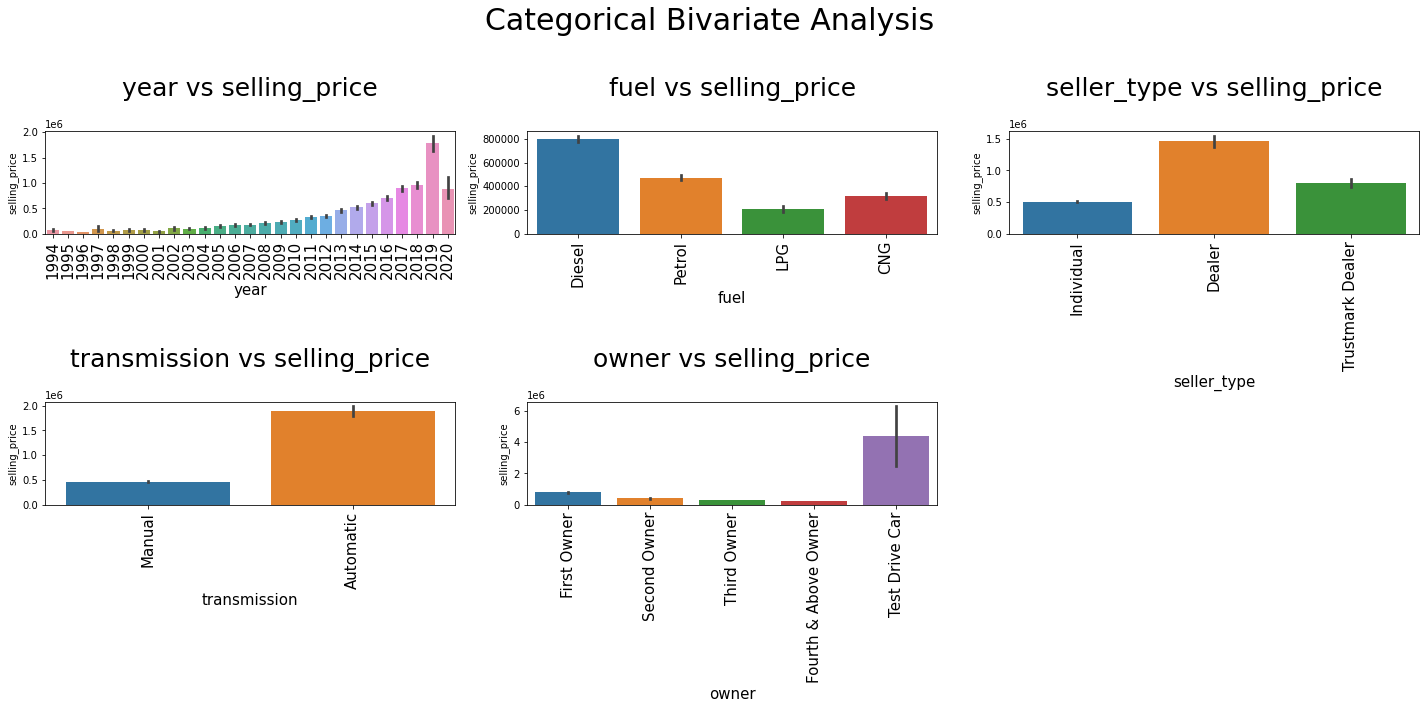

In [16]:
plt.figure(figsize = [20,10])
plt.suptitle('Categorical Bivariate Analysis\n', fontsize=30)
i=1
for col in cat_cols:
        plt.subplot(2,3,i)
        sns.barplot(x=cardata[col],y=cardata['selling_price'])
        plt.title(f'{col} vs selling_price\n', fontdict={'size':25})
        plt.xlabel(col, size=15)
        plt.xticks(size=15, rotation=90)
        i+=1
        
        
plt.tight_layout()
plt.show()

__Insights:__
    
    1. From the above we can infer that the selling price has increased in the Years 2015 - 2020.
    2. Diesel cars have more selling price than other cars.
    3. Dealers are pertaining to keep the selling price significantly high compared to individual sellers
    4. Automatic cars obviously are priced higher but the test drive cars are having huge prices compared to other classes.

### Analysis of Numeric Variables

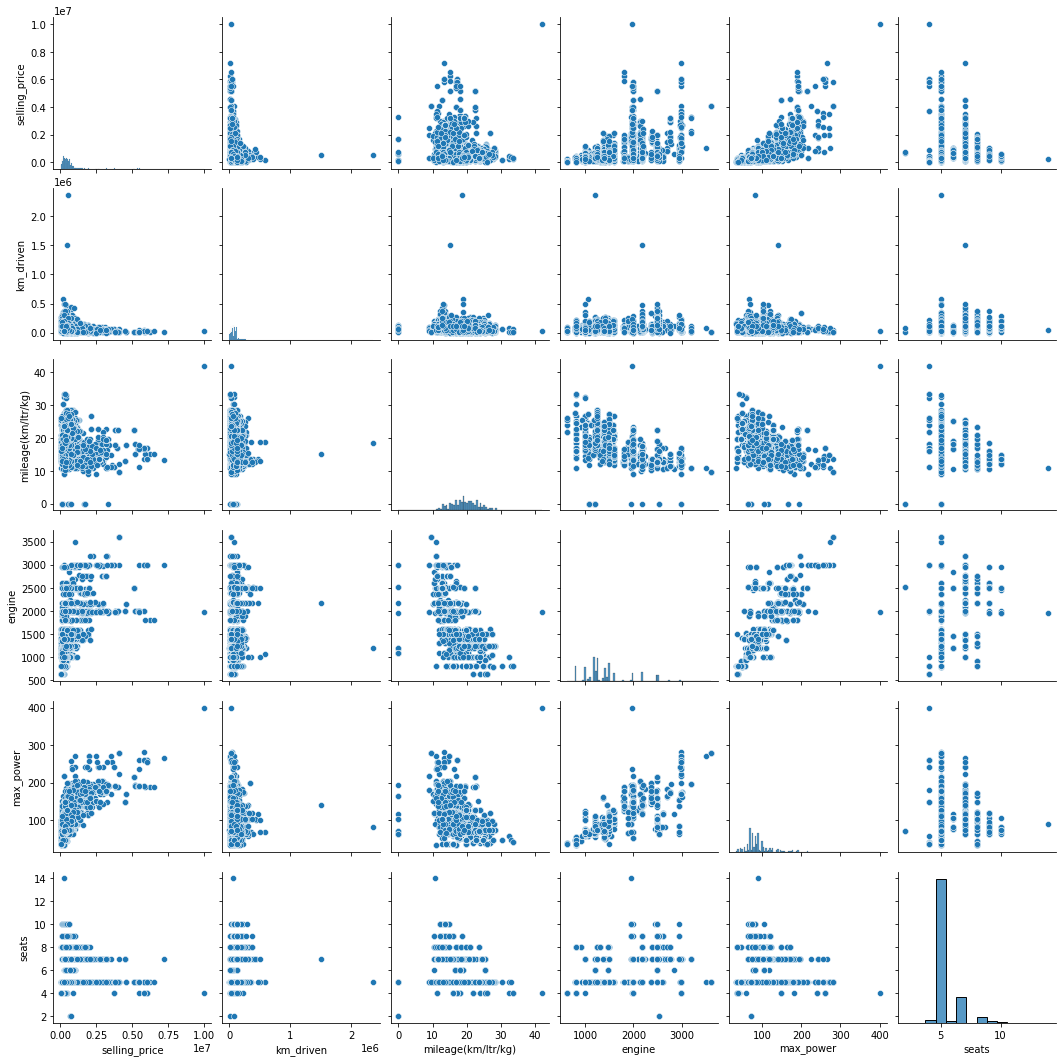

In [17]:
sns.pairplot(cardata[num_cols])
plt.show()

__Insights:__
    
    1. Engine and Max_power seems to have certain kind of correlationship.
    2. Selling_price have correlationship with max_power,engine

<AxesSubplot:>

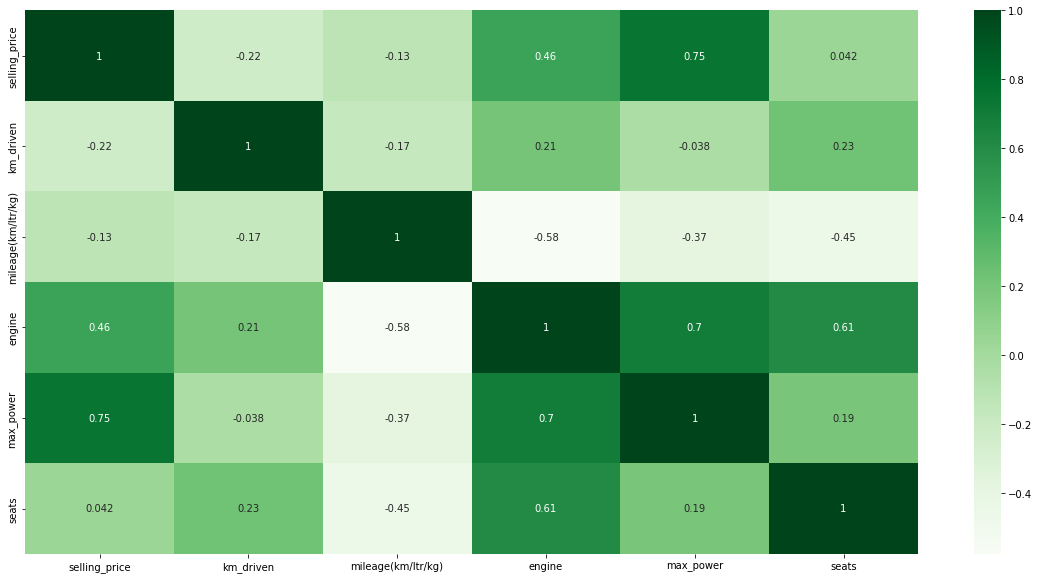

In [18]:
plt.figure(figsize = [20,10])
sns.heatmap(cardata.corr(),cmap='Greens', annot=True)

__We created a heatmap to verify if our inferences from the pairplot were true or not, as you can see engine & max_power are highly correlated to selling_price__

## Step-3: Data Preprocessing

In [19]:
cardata.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [20]:
cardata1 = pd.get_dummies(cardata)

In [21]:
cardata1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   selling_price                 7906 non-null   int64  
 1   km_driven                     7906 non-null   int64  
 2   mileage(km/ltr/kg)            7906 non-null   float64
 3   engine                        7906 non-null   float64
 4   max_power                     7906 non-null   float64
 5   seats                         7906 non-null   float64
 6   year_1994                     7906 non-null   uint8  
 7   year_1995                     7906 non-null   uint8  
 8   year_1996                     7906 non-null   uint8  
 9   year_1997                     7906 non-null   uint8  
 10  year_1998                     7906 non-null   uint8  
 11  year_1999                     7906 non-null   uint8  
 12  year_2000                     7906 non-null   uint8  
 13  yea

In [22]:
cardata1.head()

,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats,year_1994,year_1995,year_1996,year_1997,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,450000,145500,23.40,1248.0,74.00,5.0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
1,370000,120000,21.14,1498.0,103.52,5.0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,158000,140000,17.70,1497.0,78.00,5.0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,225000,127000,23.00,1396.0,90.00,5.0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
4,130000,120000,16.10,1298.0,88.20,5.0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0


__Dropping unwanted year columns__

In [23]:
cardata1.drop(columns = cardata1.columns.to_series()["year_1994": "year_2014"], axis=1,inplace=True)

## Step-4: Splitting Dataset into Train & Test sets

In [24]:
df_train,df_test = train_test_split(cardata1, train_size=0.7, test_size=0.3, random_state=100)

In [25]:
df_train.shape

(5534, 26)

In [26]:
df_test.shape

(2372, 26)

__We need to rescale some features like selling_price, km_driven etc. so that all the variables in the dataset are in the same scale and thus model prediction will be easy.__

### Re-Scaling features : StandardScaler

In [27]:
scaler = StandardScaler()
scaling_cols = ['selling_price','km_driven','mileage(km/ltr/kg)','engine','max_power','seats']
df_train[scaling_cols] = scaler.fit_transform(df_train[scaling_cols])
df_train.head()

,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats,year_2015,year_2016,year_2017,year_2018,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
1858,5.549444,-0.813850,0.736219,2.028492,3.436479,-0.436006,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
4541,-0.369360,0.829867,-0.582216,0.071849,0.738941,-0.436006,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1035,0.132505,-0.731664,2.216697,-0.420276,-0.489701,-0.436006,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
2109,2.405079,0.008008,0.247637,1.002737,1.437351,-0.436006,0,0,1,0,...,0,1,0,1,0,1,0,0,0,0
5466,-0.745450,0.336752,-0.803183,-1.313612,-1.523906,-1.467582,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0


__Creating X & y variables__

In [28]:
y_train = df_train.pop('selling_price')
X_train = df_train

In [29]:
X_train.head()

,km_driven,mileage(km/ltr/kg),engine,max_power,seats,year_2015,year_2016,year_2017,year_2018,year_2019,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
1858,-0.813850,0.736219,2.028492,3.436479,-0.436006,0,0,0,0,1,...,1,0,0,1,0,1,0,0,0,0
4541,0.829867,-0.582216,0.071849,0.738941,-0.436006,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1035,-0.731664,2.216697,-0.420276,-0.489701,-0.436006,0,0,0,0,1,...,0,1,0,0,1,1,0,0,0,0
2109,0.008008,0.247637,1.002737,1.437351,-0.436006,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,0
5466,0.336752,-0.803183,-1.313612,-1.523906,-1.467582,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0


## Step-5: Model Building

__Feature selection using RFE(Recursive Feature Elimination) method__

In [30]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm,n_features_to_select=25)
rfe = rfe.fit(X_train, y_train)

In [31]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('km_driven', True, 1),
 ('mileage(km/ltr/kg)', True, 1),
 ('engine', True, 1),
 ('max_power', True, 1),
 ('seats', True, 1),
 ('year_2015', True, 1),
 ('year_2016', True, 1),
 ('year_2017', True, 1),
 ('year_2018', True, 1),
 ('year_2019', True, 1),
 ('year_2020', True, 1),
 ('fuel_CNG', True, 1),
 ('fuel_Diesel', True, 1),
 ('fuel_LPG', True, 1),
 ('fuel_Petrol', True, 1),
 ('seller_type_Dealer', True, 1),
 ('seller_type_Individual', True, 1),
 ('seller_type_Trustmark Dealer', True, 1),
 ('transmission_Automatic', True, 1),
 ('transmission_Manual', True, 1),
 ('owner_First Owner', True, 1),
 ('owner_Fourth & Above Owner', True, 1),
 ('owner_Second Owner', True, 1),
 ('owner_Test Drive Car', True, 1),
 ('owner_Third Owner', True, 1)]

In [32]:
final_cols = X_train.columns[rfe.support_]
final_cols

Index(['km_driven', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats',
       'year_2015', 'year_2016', 'year_2017', 'year_2018', 'year_2019',
       'year_2020', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Dealer', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Automatic',
       'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')

In [33]:
X_train = X_train[final_cols]
X_train.head()

,km_driven,mileage(km/ltr/kg),engine,max_power,seats,year_2015,year_2016,year_2017,year_2018,year_2019,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
1858,-0.813850,0.736219,2.028492,3.436479,-0.436006,0,0,0,0,1,...,1,0,0,1,0,1,0,0,0,0
4541,0.829867,-0.582216,0.071849,0.738941,-0.436006,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1035,-0.731664,2.216697,-0.420276,-0.489701,-0.436006,0,0,0,0,1,...,0,1,0,0,1,1,0,0,0,0
2109,0.008008,0.247637,1.002737,1.437351,-0.436006,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,0
5466,0.336752,-0.803183,-1.313612,-1.523906,-1.467582,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0


### Model Building

In [34]:
# Model - 1
X_train_sm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train,X_train_sm)
lr_model1 = lr_1.fit()

In [35]:
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     672.3
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:26:49   Log-Likelihood:                -4337.8
No. Observations:                5534   AIC:                             8720.
Df Residuals:                    5512   BIC:                             8865.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -5.225e+12   1.35e+12     -3.865      0.000   -7.88e+12   -2.57e+12
km_driven                       -0.0383      0.008     -4.555      0.000      -0.055      -0.022
mileage(km/ltr/kg)               0.0674      0.012      5.839      0.000       0.045       0.090
engine                           0.0471      0.017      2.817      0.005       0.014       0.080
max_power                        0.5541      0.013     43.567      0.000       0.529       0.579
seats                           -0.0365      0.010     -3.499      0.000      -0.057      -0.016
year_2015                        0.1039      0.026      3.949      0.000       0.052       0.156
year_2016                        0.2086      0.026      7.957      0.000       0.157       0.260
year_2017                        0.3124      0.026     12.153      0.000       0.262       0.363
year_2018                        0.3511      0.028     12.366      0.000       0.295       0.407
year_2019                        0.9476      0.033     28.333      0.000       0.882       1.013
year_2020                        0.2779      0.074      3.759      0.000       0.133       0.423
fuel_CNG                     -2.794e+12   7.23e+11     -3.865      0.000   -4.21e+12   -1.38e+12
fuel_Diesel                  -2.794e+12   7.23e+11     -3.865      0.000   -4.21e+12   -1.38e+12
fuel_LPG                     -2.794e+12   7.23e+11     -3.865      0.000   -4.21e+12   -1.38e+12
fuel_Petrol                  -2.794e+12   7.23e+11     -3.865      0.000   -4.21e+12   -1.38e+12
seller_type_Dealer             2.49e+12   6.44e+11      3.865      0.000    1.23e+12    3.75e+12
seller_type_Individual         2.49e+12   6.44e+11      3.865      0.000    1.23e+12    3.75e+12
seller_type_Trustmark Dealer   2.49e+12   6.44e+11      3.865      0.000    1.23e+12    3.75e+12
transmission_Automatic        6.003e+12   1.55e+12      3.865      0.000    2.96e+12    9.05e+12
transmission_Manual           6.003e+12   1.55e+12      3.865      0.000    2.96e+12    9.05e+12
owner_First Owner            -4.734e+11   1.22e+11     -3.865      0.000   -7.13e+11   -2.33e+11
owner_Fourth & Above Owner   -4.734e+11   1.22e+11     -3.865      0.000   -7.13e+11   -2.33e+11
owner_Second Owner           -4.734e+11   1.22e+11     -3.865      0.000   -7.13e+11   -2.33e+11
owner_Test Drive Car         -4.734e+11   1.22e+11     -3.865      0.000   -7.13e+11   -2.33e+11
owner_Third Owner            -4.734e+11   1.22e+11     -3.865      0.000   -7.13e+11   -2.33e+11
==============================================================================
Omnibus:                     2364.554   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33988.209
Skew:                           1

In [36]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
12,fuel_Diesel,inf
13,fuel_LPG,inf
23,owner_Test Drive Car,inf
22,owner_Second Owner,inf
21,owner_Fourth & Above Owner,inf
20,owner_First Owner,inf
19,transmission_Manual,inf
18,transmission_Automatic,inf
17,seller_type_Trustmark Dealer,inf
16,seller_type_Individual,inf


Looks like there are many highly correlated variables, we need to drop them

In [37]:
collinear_columns = vif['Features'].iloc[0:14]
collinear_columns

12                     fuel_Diesel
13                        fuel_LPG
23            owner_Test Drive Car
22              owner_Second Owner
21      owner_Fourth & Above Owner
20               owner_First Owner
19             transmission_Manual
18          transmission_Automatic
17    seller_type_Trustmark Dealer
16          seller_type_Individual
15              seller_type_Dealer
14                     fuel_Petrol
24               owner_Third Owner
11                        fuel_CNG
Name: Features, dtype: object

In [38]:
X_train.drop(columns = collinear_columns, axis=1, inplace=True)
X_train.head()

,km_driven,mileage(km/ltr/kg),engine,max_power,seats,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020
1858,-0.813850,0.736219,2.028492,3.436479,-0.436006,0,0,0,0,1,0
4541,0.829867,-0.582216,0.071849,0.738941,-0.436006,0,0,0,0,0,0
1035,-0.731664,2.216697,-0.420276,-0.489701,-0.436006,0,0,0,0,1,0
2109,0.008008,0.247637,1.002737,1.437351,-0.436006,0,0,1,0,0,0
5466,0.336752,-0.803183,-1.313612,-1.523906,-1.467582,0,0,0,0,0,0


### Re-Building Model

In [39]:
# Model - 2
X_train_sm1 = sm.add_constant(X_train)
lr_2 = sm.OLS(y_train,X_train_sm1)
lr_model2 = lr_2.fit()

In [40]:
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     1067.
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:26:49   Log-Likelihood:                -4699.9
No. Observations:                5534   AIC:                             9424.
Df Residuals:                    5522   BIC:                             9503.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2136      0.012    -17.586      0.000      -0.237      -0.190
km_driven             -0.0530      0.009     -6.024      0.000      -0.070      -0.036
mileage(km/ltr/kg)     0.0881      0.010      8.766      0.000       0.068       0.108
engine                 0.0840      0.016      5.367      0.000       0.053       0.115
max_power              0.6685      0.013     53.083      0.000       0.644       0.693
seats                 -0.0650      0.011     -6.014      0.000      -0.086      -0.044
year_2015              0.1165      0.027      4.243      0.000       0.063       0.170
year_2016              0.2491      0.027      9.293      0.000       0.197       0.302
year_2017              0.3624      0.026     13.831      0.000       0.311       0.414
year_2018              0.4442      0.029     15.435      0.000       0.388       0.501
year_2019              1.0935      0.034     32.633      0.000       1.028       1.159
year_2020              0.3277      0.078      4.201      0.000       0.175       0.481
==============================================================================
Omnibus:                     2544.983   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31845.168
Skew:                           1.867   Prob(JB):                         0.00
Kurtosis:                      14.143   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,engine,4.22
3,max_power,2.63
4,seats,1.99
1,mileage(km/ltr/kg),1.63
0,km_driven,1.22
9,year_2019,1.11
8,year_2018,1.06
7,year_2017,1.05
6,year_2016,1.02
5,year_2015,1.01


All the features are having VIF score less than 5 thus, the model looks good & balanced

In [42]:
y_train_pred = lr_model2.predict(X_train_sm1)
y_train_pred

1858    3.483745
4541    0.219535
1035    0.779515
2109    1.243596
5466   -1.335779
          ...   
82      1.928229
4048    0.116781
6128   -0.720646
7132   -0.619616
5803    0.293546
Length: 5534, dtype: float64

### Residual Analysis on Error Terms

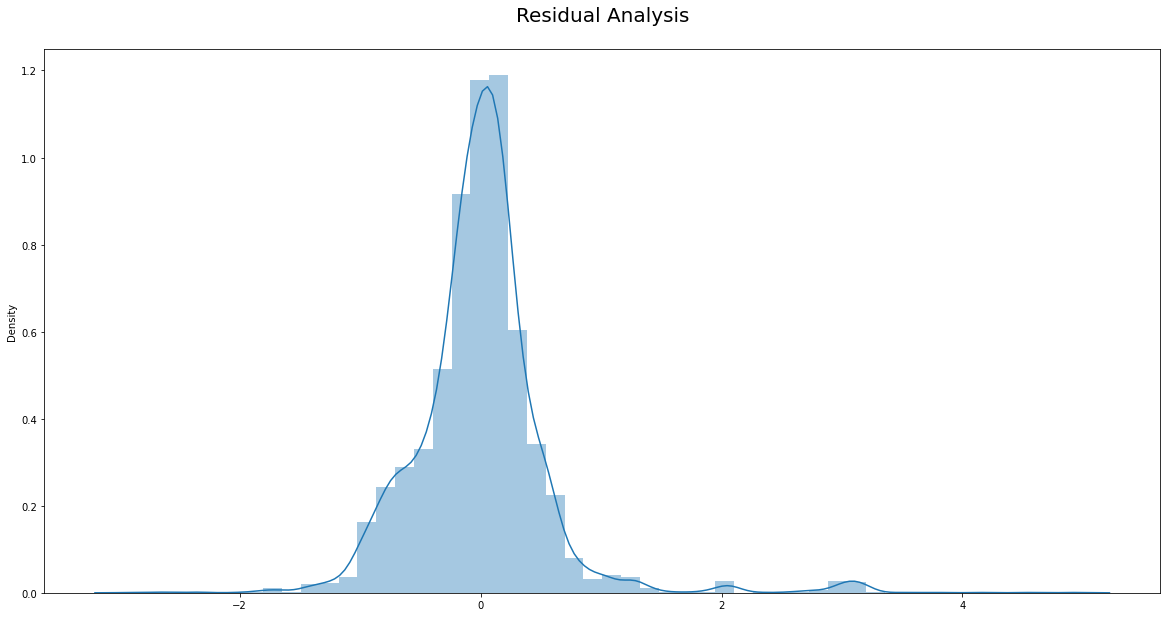

In [43]:
residual = y_train - y_train_pred

plt.figure(figsize=[20,10])
sns.distplot(residual)
plt.title('Residual Analysis\n', fontdict={'size':20})
plt.show()

__The Error terms are normally distributed at mean = 0, Looks perfect!__ 

## Step-6: Model Prediction on Test set

In [44]:
df_test.head()

,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats,year_2015,year_2016,year_2017,year_2018,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
7406,445000,100000,25.80,1498.0,98.60,5.0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
3896,411000,25000,23.10,998.0,67.04,5.0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
4806,490000,90000,12.05,2179.0,120.00,8.0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
6915,360000,110000,16.78,1496.0,88.73,5.0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4930,40000,80000,16.10,796.0,37.00,4.0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0


### Re-Scaling features : StandardScaler

In [45]:
scaling_cols = ['selling_price','km_driven','mileage(km/ltr/kg)','engine','max_power','seats']
df_test[scaling_cols] = scaler.transform(df_test[scaling_cols])
df_test.head()

,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats,year_2015,year_2016,year_2017,year_2018,...,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
7406,-0.252217,0.501123,1.578348,0.073826,0.196975,-0.436006,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
3896,-0.294142,-0.731664,0.915448,-0.914378,-0.684697,-0.436006,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
4806,-0.196728,0.336752,-1.797533,1.419759,0.794814,2.658722,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
6915,-0.357029,0.665495,-0.636230,0.069873,-0.078757,-0.436006,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4930,-0.751616,0.172380,-0.803183,-1.313612,-1.523906,-1.467582,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0


__Creating X & y variables__

In [46]:
y_test = df_test.pop('selling_price')
X_test = df_test

Since, we have elminated many variables/features using RFE & Manual Elimination methods, we can select only required columns based on lr_model2

In [47]:
X_test = X_test[X_train.columns]
X_test.head()

,km_driven,mileage(km/ltr/kg),engine,max_power,seats,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020
7406,0.501123,1.578348,0.073826,0.196975,-0.436006,0,0,0,0,0,0
3896,-0.731664,0.915448,-0.914378,-0.684697,-0.436006,0,1,0,0,0,0
4806,0.336752,-1.797533,1.419759,0.794814,2.658722,0,0,0,0,0,0
6915,0.665495,-0.636230,0.069873,-0.078757,-0.436006,1,0,0,0,0,0
4930,0.172380,-0.803183,-1.313612,-1.523906,-1.467582,0,0,0,0,0,0


In [48]:
X_test_sm = sm.add_constant(X_test)
X_test_sm

,const,km_driven,mileage(km/ltr/kg),engine,max_power,seats,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020
7406,1.0,0.501123,1.578348,0.073826,0.196975,-0.436006,0,0,0,0,0,0
3896,1.0,-0.731664,0.915448,-0.914378,-0.684697,-0.436006,0,1,0,0,0,0
4806,1.0,0.336752,-1.797533,1.419759,0.794814,2.658722,0,0,0,0,0,0
6915,1.0,0.665495,-0.636230,0.069873,-0.078757,-0.436006,1,0,0,0,0,0
4930,1.0,0.172380,-0.803183,-1.313612,-1.523906,-1.467582,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1.0,0.353189,0.777957,-0.127768,-0.078757,-0.436006,0,0,0,0,0,0
5198,1.0,0.336752,0.630646,-0.523049,-0.797560,-0.436006,0,0,0,0,0,0
2876,1.0,0.049101,0.964552,1.034359,1.632906,-0.436006,0,0,0,0,0,0
818,1.0,0.336752,0.080684,-1.313612,-1.579779,2.658722,0,0,0,0,0,0


__Model Prediction__

In [49]:
y_test_pred = lr_model2.predict(X_test_sm)
y_test_pred

7406    0.065069
3896   -0.351238
4806    0.088093
6915   -0.206769
4930   -1.327072
          ...   
1304   -0.198823
5198   -0.724625
2876    1.075531
818    -1.563489
2297   -0.749643
Length: 2372, dtype: float64

### Test values Vs Predicted values

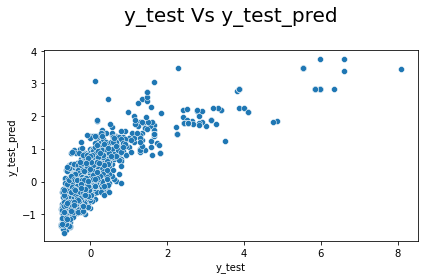

In [50]:
sns.scatterplot(x=y_test,y=y_test_pred)
plt.title('y_test Vs y_test_pred\n', fontsize=20)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.tight_layout()

__From the above we can see that there is good collinear relationshop/Pattern__

## Step-7: Model Evaluation using Statistics

In [51]:
train_r_squared = r2_score(y_train,y_train_pred)

# number of rows
N_train = X_train.shape[0]

#number of features
P_train = X_train.shape[1]


train_adj_r_squared = round(1 - (1-train_r_squared)*(N_train-1)/(N_train-P_train-1),3)
train_adj_r_squared

0.679

In [52]:
test_r_squared = r2_score(y_test,y_test_pred)

# number of rows
N_test = X_test.shape[0]

#number of features
P_test = X_test.shape[1]


test_adj_r_squared = round(1 - (1-test_r_squared)*(N_test-1)/(N_test-P_test-1),3)
test_adj_r_squared

0.683

In [53]:
stats_data = [['Train_Data',round(train_r_squared,3),train_adj_r_squared],['Test_Data',round(test_r_squared,3),test_adj_r_squared]]
final_stats = pd.DataFrame(stats_data,columns=['Data Category','R2_Value','Adjusted_R2_Value'])
final_stats

,Data Category,R2_Value,Adjusted_R2_Value
0,Train_Data,0.680,0.679
1,Test_Data,0.685,0.683


## Final Model:

In [54]:
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     1067.
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:26:50   Log-Likelihood:                -4699.9
No. Observations:                5534   AIC:                             9424.
Df Residuals:                    5522   BIC:                             9503.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2136      0.012    -17.586      0.000      -0.237      -0.190
km_driven             -0.0530      0.009     -6.024      0.000      -0.070      -0.036
mileage(km/ltr/kg)     0.0881      0.010      8.766      0.000       0.068       0.108
engine                 0.0840      0.016      5.367      0.000       0.053       0.115
max_power              0.6685      0.013     53.083      0.000       0.644       0.693
seats                 -0.0650      0.011     -6.014      0.000      -0.086      -0.044
year_2015              0.1165      0.027      4.243      0.000       0.063       0.170
year_2016              0.2491      0.027      9.293      0.000       0.197       0.302
year_2017              0.3624      0.026     13.831      0.000       0.311       0.414
year_2018              0.4442      0.029     15.435      0.000       0.388       0.501
year_2019              1.0935      0.034     32.633      0.000       1.028       1.159
year_2020              0.3277      0.078      4.201      0.000       0.175       0.481
==============================================================================
Omnibus:                     2544.983   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31845.168
Skew:                           1.867   Prob(JB):                         0.00
Kurtosis:                      14.143   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusions:

1. The selling price of the car is affected by km_driven parameter, where more the kilometers the car is driven the   less the selling price of the car.
2. The Max_Power variable is majorly impacting the selling price of the car, as per our linear model, __66.85%__ of the selling price is explained/impacted by max_power of the car.
3. Although Mileage & Engine CC contribute almost equally to the selling price of the car.
4. Cars with Model-Year or manufactured-year between __2018-2020__ will have major effect in the selling_price of the car, especially the Cars manufactured in the year 2019 will tend to have high selling price
5. The more the number of seats, the less the selling price of the car